A forma que observamos para classicar as casas mais favoráveis para se investir, foi aplicando pontuações a partir dos parâmetros que caracterizavam cada casa. Os parâmetros foram escalados para que recebesse uma quantidade de pontos de acordo com as características do parâmetro.  

In [256]:
import pandas as pd
from pandas.api.types import CategoricalDtype

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style()
import math as mt
from scipy import stats, linalg

import folium
from folium.plugins import MarkerCluster

from google.colab import files

In [257]:
!pip install folium

In [258]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (3).csv


In [259]:
df = pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [260]:
corrMat = df.corr()
df_corrMat = pd.DataFrame(data = corrMat['price'])
df_corrMat
df_corrMat = df_corrMat.drop(['id', 'price', 'yr_renovated', 'lat', 'long', 'zipcode'])
df_corrMat.sort_values(by=['price'], ascending = False)

,price
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
waterfront,0.266369
floors,0.256794


PONTUAÇÃO DOS QUARTOS

As casas receberam pontos de acordo com o número quartos que cada casa tem. Acima de 7 quartos consideramos que fosse um número que não representasse uma casa não "convencional", que talvez não fosse interessante para o mercado.

In [261]:
quartos = df['bedrooms'].tolist()

qu1 = []

for x in quartos:
    if x > 7:
        qu1.append(0)
    else:
        qu1.append(x)
print(qu1[0:10])

[3, 3, 2, 4, 3, 4, 3, 3, 3, 3]


PONTUAÇÃO DOS BANHEIROS

In [262]:
banheiros = df['bathrooms'].tolist()
banheiros2 = []
for x in banheiros:
    x = mt.ceil(x)
    banheiros2.append(x)
print(len(banheiros2))

bn = []
for x in banheiros2:
    if x == 0:
        bn.append(0)
    elif x == 1:
        bn.append(1)
    elif x == 2:
        bn.append(2)
    elif x == 3:
        bn.append(3)
    elif x == 4:
        bn.append(4)
    elif x == 5:
        bn.append(5)
    elif x == 6:
        bn.append(6)
    elif x == 7:
        bn.append(7)
    elif x == 8:
        bn.append(8)
        
print(len(bn))

21613
21613


PONTUAÇÃO DA CONDIÇÃO DA CASA

Quanto a condição da casa, esse parâmetro pontuou as casas de acordo com a nota que receberam segundo sua condição de uso.

In [263]:
condicao = df['condition'].tolist()

cd = []
for x in condicao:
    if x == 1:
        cd.append(1)
    elif x == 2:
        cd.append(2)
    elif x == 3:
        cd.append(3)
    elif x == 4:
        cd.append(4)
    elif x == 5:
        cd.append(5)
        
print(len(cd))

21613


PONTUAÇÃO DO PADRÃO DE QUALIDADE DA CASA

In [264]:
padrao = df['grade'].tolist()
print(len(padrao))

pr = []
for x in padrao:
    if x < 3:
        pr.append(1)
    elif 2 < x < 5 :
        pr.append(2)
    elif 4 < x < 7:
        pr.append(3)
    elif 6 < x < 9:
        pr.append(4)
    elif 8 < x < 11:
        pr.append(5)
    elif 10 < x <13 :
        pr.append(6)
    elif x > 12:
        pr.append(7)
        
print(len(pr))

21613
21613


PONTUAÇÃO DA VISTA DA CASA

Quanto a vista da casa, esse parâmetro pontuou as casas de acordo com a nota que receberam segundo a vista da casa.

In [265]:
visao = df['view'].tolist()

vs = []
for x in visao:
    if x == 0:
        vs.append(0)
    elif x == 1:
        vs.append(1)
    elif x == 2:
        vs.append(2)
    elif x == 3:
        vs.append(3)
    elif x == 4:
        vs.append(4)
        
print(len(vs))

21613


PONTUAÇÃO DA VISTA FRENTE AO MAR

As casa receberam um ponto natural pela sua localização de frente a corpos d'água.

In [266]:
frente_mar = df['waterfront'].tolist()

fm = []
for x in frente_mar:
    if x == 0:
        fm.append(0)
    elif x == 1:
        fm.append(1)
        
print(len(fm))

21613


PONTUAÇÃO DO NÚMERO DE PISOS

In [267]:
nº_pavto = df['floors'].tolist()
nº_pavtos = []
for x in nº_pavto:
    nº_pavtos.append(int(mt.ceil(x)))
print(type(nº_pavtos[0]))

pv = []
for x in nº_pavtos:
    if x == 1:
        pv.append(0)
    elif x == 2:
        pv.append(1)
    elif x == 3:
        pv.append(2)
    elif x == 4:
        pv.append(3)
    elif x == 5:
        pv.append(4)
    elif x == 6:
        pv.append(5)

print(len(pv))

<class 'int'>
21613


PONTUAÇÃO DE ACORDO COM A QUALIDADE DO CEP QUE A CASA ESTÁ

Por meio de pesquisas em sites(niche.com), conseguimos achar algumas referências quanto a zipcodes do condado de King que representavam locais com melhor qualidade de vida e vizinhança. Do mesmo modo, também observamos os zipcodes que representavam os locais com as piores localizações. As casas em zipcode valorizados receberam mais um ponto, as que estavam em zips mais desvalorizados receberam menos um ponto, e os outros em geral receberam zero pontos.

In [268]:
ZIPs = df['zipcode'].tolist()

cep1PONTO = [98074, 98029, 98052, 98019, 98075, 98065, 98038]
cepn1PONTO = [98057, 98050, 98224, 98134, 98070, 98288, 98148]
cepp = [] 

for x in ZIPs:
    if x in cep1PONTO:
        cepp.append(1)
    elif x in cepn1PONTO:
        cepp.append(-1)
    else:
        cepp.append(0)
        
print(len(cepp))

21613


PONTUAÇÃO QUANTO A ÁREA DA CASA

Os pontos que as casa receberam de acordo com a área do espaço de vivêcia foram definidos de acordo com os quartils do seu gráfico. Abaixo do 1º quartil recebe 0 pontos, as casas construídas nos anos entre o 1º 2º quartil receberam 1 ponto, entre o 3º e o 4º dois pontos, acima do 4º recebem 3 pontos.

In [269]:
casa_m = df['sqft_living'].tolist()
casa_m2 = []
for x in casa_m:
    casa_m2.append(round(x/3.28,2))
print(casa_m2[0:10])


cm2 = []
for y in casa_m2:
  if y <= 1427:
    cm2.append(0)
  if 1427 < y <= 1910:
    cm2.append(1)
  if 1910 < y <= 2550:
    cm2.append(2)
  if y > 2550:
    cm2.append(4) 
    
print(len(cm2))


[359.76, 783.54, 234.76, 597.56, 512.2, 1652.44, 522.87, 323.17, 542.68, 576.22]
21613


PONTUAÇÃO QUANTO A ÁREA DO LOTE

Os pontos que as casa receberam de acordo com a área do lote foram definidos de acordo com os quartils do seu gráfico. Abaixo do 1º quartil recebe 0 pontos, as casas construídas nos anos entre o 1º 2º quartil receberam 1 ponto, entre o 3º e o 4º dois pontos, acima do 4º recebem 3 pontos.

In [270]:
lotem = df['sqft_lot'].tolist()
lotem2 = []
for x in lotem:
    lotem2.append(round(x/3.28,2))
print(lotem2[0:10])
print(lotem[0:10])

lm2 = []
for y in casa_m2:
  if y <= 5040:
    lm2.append(0)
  if 5040 < y <= 7618:
    lm2.append(1)
  if 7618 < y <= 10688:
    lm2.append(2)
  if y > 10688:
    lm2.append(4) 
    
print(len(lm2))

[1722.56, 2207.93, 3048.78, 1524.39, 2463.41, 31076.22, 2078.96, 2960.67, 2277.44, 2000.0]
[5650, 7242, 10000, 5000, 8080, 101930, 6819, 9711, 7470, 6560]
21613


PONTUAÇÃO QUANTO A PRESENÇA DE ESPAÇO EM SUBSOLO

As casas que ponssuiam casas no subsolo naturalmente recebem 1 ponto e as que não tem 0 pontos. Essa decisão foi tomada porque apesar das casas com subsolo terem esse espaço em diferentes tamanhos entre si, não se sabe da qualidade de uso desses cômodos em subsolo. Não necessariamente subsolos maiores se mostram como melhores investimentos.

In [271]:
sbs2 = df['sqft_basement'].tolist()
subsolo = []
for x in sbs2:
    subsolo.append(round(x/3.28,2))
print(subsolo[0:50])

sbs3 = []

for x in subsolo:
    if x != 0:
        sbs3.append(1)
    else:
        sbs3.append(0)
        
print(sbs3[0:20])
    

[0.0, 121.95, 0.0, 277.44, 0.0, 466.46, 0.0, 0.0, 222.56, 0.0, 518.29, 91.46, 0.0, 0.0, 0.0, 295.73, 0.0, 0.0, 0.0, 0.0, 231.71, 219.51, 0.0, 0.0, 0.0, 0.0, 213.41, 0.0, 222.56, 0.0, 0.0, 0.0, 250.0, 0.0, 237.8, 240.85, 222.56, 0.0, 100.61, 0.0, 0.0, 493.9, 0.0, 0.0, 109.76, 0.0, 0.0, 0.0, 0.0, 179.27]
[0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]


PONTUAÇÃO QUANTO AO ANO DE CONSTRUÇÃO

Os pontos que as casa receberam de acordo com o ano de construção foram definidos de acordo com os quartils do seu gráfico. Abaixo do 1º quartil recebe 0 pontos, as casas construídas nos anos entre o 1º 2º quartil receberam 1 ponto, entre o 3º e o 4º dois pontos, acima do 4º recebem 3 pontos.

In [272]:
construcao = df['yr_built'].tolist()
1951, 1975, 1997

const = []
for y in construcao:
  if y <= 1951:
    const.append(0)
  if 1951 < y <= 1975:
    const.append(1)
  if 1975 < y <= 1997:
    const.append(2)
  if y > 1997:
    const.append(3) 
    
print(len(const))

21613


PONTUAÇÃO AO ANO DE REFORMA

Pontuação baseado no ano de reforma, deu mais pontos para as casa que tiveram as reformas mais recentes. A pontuação vai diminuindo dentro de faixas de 20 anos.

In [273]:
reforma = df['yr_renovated'].tolist()
print(len(reforma))

# Esse primeiro laço for pode ser excluído
rfm = []
for x in reforma:
    if x != 0:
        rfm.append(x)
print(len(rfm))

yrfm = [] 
for x in reforma:
    if x >= 2000:
        yrfm.append(3)
    if 1980 <= x < 2000:
        yrfm.append(2)
    if 1960 <= x < 1980:
        yrfm.append(1)
    if x < 1960:
        yrfm.append(0)
        
print(len(yrfm))

21613
914
21613


PREÇO DA CASA

In [274]:
prec = df['price'].tolist()
preco = []
for x in prec:
    y = x*5.18
    preco.append(y)
    
print(preco[0:10])

[1149442.0, 2786840.0, 932400.0, 3128720.0, 2641800.0, 6345500.0, 1333850.0, 1511783.0, 1188810.0, 1673140.0]


VALOR POR METRO QUADRADO

In [275]:
valor_cm2 = []
for x, y in zip(preco, casa_m2):
    valor_cm2.append(x/y)
print(valor_cm2[0:10])

[3195.0244607516124, 3556.729713862726, 3971.7157948543195, 5235.825691143986, 5157.750878563061, 3840.0789136065455, 2551.016505058619, 4677.980629390104, 2190.627994398172, 2903.6479122557357]


In [276]:
IDs = df['id'].tolist()
print(len(IDs))

21613


SOMA DE TODAS AS PONTUAÇÕES

O seguinte código monta um laço for in ZIP para somar as pontuação que cada casa teve, vinda de cada um dos seus parâmetros. Logo em seguida é montado um dicionários que alinha o ID das casa com a sua respectiva soma de pontos.

In [277]:
d = []
for b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13 in zip(cm2, bn, cd, pr, vs, fm, pv, cepp, qu1, lm2,const, yrfm, sbs3):
        d.append(b1 + b2+ b3+ b4+ b5+ b6+ b7+ b8+ b9+ b10+ b11+ b12 + b13)
print(len(d), '\n')

rank_casas = dict()
for x, y in zip(IDs,d):
    rank_casas[x] = y

rank_casas_T = sorted(rank_casas.items(), key=lambda x: x[1], reverse = True)
rank_casas_F = sorted(rank_casas.items(), key=lambda x: x[1], reverse = False)

print(rank_casas_T[0:10], '\n')
print(rank_casas_F[0:10])

21613 

[(1225069038, 38), (6762700020, 37), (9208900037, 37), (1924059029, 36), (2303900035, 36), (7558700030, 33), (2424049029, 33), (1247600105, 32), (7738500731, 32), (9808700762, 31)] 

[(3980300371, 3), (5702500050, 5), (8658300340, 6), (859000110, 6), (6896300380, 6), (4008400515, 6), (2023049218, 6), (745000005, 6), (3421079032, 7), (723049596, 7)]


 - No dataframe foi acrescentado mais uma coluna referente a pontuação que cada uma das casas acumulou.

In [278]:
df['pontuacao'] = d
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,17
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,9
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,18
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,18
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,18
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,14
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,17


In [279]:
df = df.reset_index(drop=True)

In [280]:
df['casa_m²'] = casa_m2
df['preço'] = preco
df['lote_m²'] = lotem2
df['preço por m²'] = valor_cm2

As casas foram ordenadas da menor pontuação para a maior pontuação. Em seguida foram montados dataframes com as 20 melhores e as 20 piores pontuações. 

In [281]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,18,466.46,1864800.00,344.82,3997.770441
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,18,704.27,2072000.00,1772.26,2942.053474
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,14,310.98,2082883.18,411.59,6697.804296
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,17,487.80,2072000.00,728.05,4247.642476
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357,14,310.98,1683500.00,328.05,5413.531417


In [282]:
worst_homes = df.sort_values(by=['pontuacao']).head(20)
best_homes = df.sort_values(by=['pontuacao']).tail(20)

5 CASAS MAIS BEM AVALIADAS PARA INVESTIR

Abaixo, o dataframa foi ordenado a partir do valor monetário das casas. O objetivo era o de buscar as 5 casas mais baratas dentro das melhores pontuações.

In [283]:
best_homes.sort_values(by=['preço']).head(5)
df_melhoresCasas = best_homes.sort_values(by=['preço']).head(5)

df_X = df_melhoresCasas.drop(['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'pontuacao', 'casa_m²','lote_m²','preço por m²'], axis = 1)
df_X = df_melhoresCasas.reset_index(drop=True)
df_X

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
0,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,31,2170.73,4662000.0,12440.85,2147.664611
1,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,3,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587,30,2240.85,5749800.0,3728.96,2565.901332
2,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,3,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803,30,2097.56,7707840.0,85356.10,3674.669616
3,4030100290,20141001T000000,1680000.0,5,3.50,5170,7197,3.0,1,4,3,11,3520,1650,1998,0,98155,47.7561,-122.271,3020,12880,30,1576.22,8702400.0,2194.21,5521.056705
4,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593,30,2201.22,10049200.0,68128.66,4565.286523


In [284]:
#from google.colab import files
#df_X.to_csv('df_X.csv', sep = ',' , index = False) 
#files.download('df_X.csv')

5 CASAS MAIS BEM AVALIADAS PARA NÃO SE INVESTIR

De forma que na tabela anterior as casas foram ordenadas a partir dos seus valores . O objetivo era o de buscar as 5 casas mais caras dentro das mais baixas pontuações pontuações.

In [285]:
worst_homes.sort_values(by=['preço']).tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,5,182.93,1450400.0,7469.82,7928.715902
12453,4022900951,20150402T000000,305000.0,2,1.0,910,22725,1.0,0,0,1,6,910,0,1926,0,98155,47.7712,-122.299,2000,14566,7,277.44,1579900.0,6928.35,5694.564591
9276,722039087,20150504T000000,329000.0,2,1.0,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442,7,301.83,1704220.0,17530.18,5646.290958
13629,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584,6,283.54,2305100.0,2359.76,8129.717147
18645,7942600910,20141216T000000,575000.0,1,1.0,1310,8667,1.5,0,0,1,6,1310,0,1918,0,98122,47.6059,-122.313,1130,4800,7,399.39,2978500.0,2642.38,7457.622875


In [286]:
df_pioresCasas = worst_homes.sort_values(by=['preço']).tail(5)

df_Y = df_pioresCasas.drop(['sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode','sqft_living15', 'sqft_lot15', 'pontuacao', 'casa_m²','lote_m²','preço por m²'], axis = 1)
df_Y = df_pioresCasas.reset_index(drop=True)
df_Y

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
0,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,5,182.93,1450400.0,7469.82,7928.715902
1,4022900951,20150402T000000,305000.0,2,1.0,910,22725,1.0,0,0,1,6,910,0,1926,0,98155,47.7712,-122.299,2000,14566,7,277.44,1579900.0,6928.35,5694.564591
2,722039087,20150504T000000,329000.0,2,1.0,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442,7,301.83,1704220.0,17530.18,5646.290958
3,2023049218,20150316T000000,445000.0,2,1.0,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584,6,283.54,2305100.0,2359.76,8129.717147
4,7942600910,20141216T000000,575000.0,1,1.0,1310,8667,1.5,0,0,1,6,1310,0,1918,0,98122,47.6059,-122.313,1130,4800,7,399.39,2978500.0,2642.38,7457.622875


In [287]:
#from google.colab import files
#df_X.to_csv('df_Y.csv', sep = ',' , index = False) 
#files.download('df_Y.csv')

In [288]:
df_merged = df_X.merge(df_Y, how = 'left', on = 'id')

In [289]:
frames = [df_X, df_Y]

In [290]:
df_concat = pd.concat(frames, ignore_index=True, sort=False)

In [291]:
df_concat.to_csv('df_concat.csv', sep = ',' , index = False)

In [292]:
df_concat

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
0,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,31,2170.73,4662000.0,12440.85,2147.664611
1,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,3,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587,30,2240.85,5749800.0,3728.96,2565.901332
2,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,3,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803,30,2097.56,7707840.0,85356.10,3674.669616
3,4030100290,20141001T000000,1680000.0,5,3.50,5170,7197,3.0,1,4,3,11,3520,1650,1998,0,98155,47.7561,-122.271,3020,12880,30,1576.22,8702400.0,2194.21,5521.056705
4,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593,30,2201.22,10049200.0,68128.66,4565.286523
5,5702500050,20141104T000000,280000.0,1,0.00,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,5,182.93,1450400.0,7469.82,7928.715902
6,4022900951,20150402T000000,305000.0,2,1.00,910,22725,1.0,0,0,1,6,910,0,1926,0,98155,47.7712,-122.299,2000,14566,7,277.44,1579900.0,6928.35,5694.564591
7,722039087,20150504T000000,329000.0,2,1.00,990,57499,1.0,0,0,2,6,990,0,1949,0,98070,47.4145,-122.463,2090,27442,7,301.83,1704220.0,17530.18,5646.290958
8,2023049218,20150316T000000,445000.0,2,1.00,930,7740,1.0,0,0,1,5,930,0,1932,0,98148,47.4611,-122.324,1620,8584,6,283.54,2305100.0,2359.76,8129.717147
9,7942600910,20141216T000000,575000.0,1,1.00,1310,8667,1.5,0,0,1,6,1310,0,1918,0,98122,47.6059,-122.313,1130,4800,7,399.39,2978500.0,2642.38,7457.622875


Preço por m²
Excluir colunas com titulos em pt (casam2, preço e lotem2)
Tabela de correlacao
Grafico
Limpar tabela


Plotagem no mapa - Biblioteca Folium

In [293]:
df_concat = pd.read_csv('df_concat.csv', parse_dates = ['date'])
df_type = CategoricalDtype(categories = df, ordered=True)

In [294]:
df['view'] = df['view'].astype(df_type)
df['condition'] = df['condition'].astype(df_type)
df['grade'] = df['grade'].astype(CategoricalDtype(categories = df, ordered=False))
df['zipcode'] = df['zipcode'].astype(str)
df.sort_values(by=['date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
16768,5561000190,20140502T000000,437500.0,3,2.25,1970,35100,2.0,0,NaN,NaN,NaN,1970,0,1977,0,98027,47.4635,-121.991,2340,35100,18,600.61,2266250.0,10701.22,3773.247199
9596,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,NaN,NaN,NaN,1700,900,1951,0,98117,47.6833,-122.400,2380,4750,16,792.68,4092200.0,1448.17,5162.486754
9587,1024069009,20140502T000000,675000.0,5,2.50,2820,67518,2.0,0,NaN,NaN,NaN,2820,0,1979,0,98029,47.5794,-122.025,2820,48351,19,859.76,3496500.0,20584.76,4066.832604
20602,7853361370,20140502T000000,555000.0,4,2.50,3310,6500,2.0,0,NaN,NaN,NaN,3310,0,2012,0,98065,47.5150,-121.870,2380,5000,19,1009.15,2874900.0,1981.71,2848.833176
11577,5056500260,20140502T000000,440000.0,4,2.25,2160,8119,1.0,0,NaN,NaN,NaN,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000,16,658.54,2279200.0,2475.30,3460.989462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,20150514T000000,183000.0,3,1.00,1170,7320,1.0,0,NaN,NaN,NaN,1170,0,1962,0,98188,47.4685,-122.282,2040,7320,12,356.71,947940.0,2231.71,2657.452833
928,8730000270,20150514T000000,359000.0,2,2.75,1370,1140,2.0,0,NaN,NaN,NaN,1080,290,2009,0,98133,47.7052,-122.343,1370,1090,17,417.68,1859620.0,347.56,4452.260103
5637,7923600250,20150515T000000,450000.0,5,2.00,1870,7344,1.5,0,NaN,NaN,NaN,1870,0,1960,0,98007,47.5951,-122.144,1870,7650,16,570.12,2331000.0,2239.02,4088.612924
13053,5101400871,20150524T000000,445500.0,2,1.75,1390,6670,1.0,0,NaN,NaN,NaN,720,670,1941,0,98115,47.6914,-122.308,920,6380,11,423.78,2307690.0,2033.54,5445.490585


In [301]:
map_h = folium.Map(location = [df['lat'].mean(), df['long'].mean()], zoom_start = 10)
marker_cluster = MarkerCluster().add_to(map_h)
MAX_RECORDS = 100

for name, row in df.iterrows():
    folium.Marker([row["lat"], row["long"]], 
                  popup="Preço de venda {0}$ on: {1}. Features: {2} Área, {3} Quartos, {4} Banheiros, Ano de construção: {5}".format(row["price"], row["date"], row['sqft_living'], row['bedrooms'], row['bathrooms'], row['yr_built'])).add_to(marker_cluster)
                
map_h

Gráficos

Text(0.5, 1.0, 'Pontuação Geral')

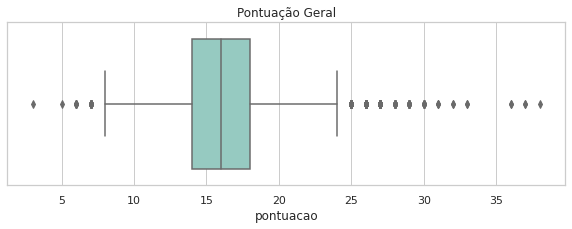

In [325]:
plt.figure(figsize=(10,3))
sns.set_theme(style="whitegrid")
sns.boxplot(x="pontuacao", data=df, palette="Set3")
plt.title("Pontuação Geral")

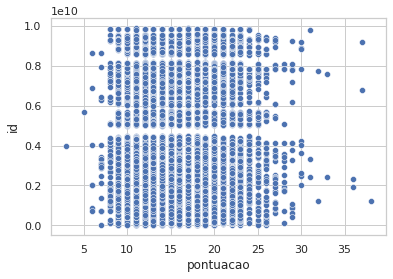

In [297]:
sns.scatterplot(data=df, x="pontuacao", y="id")

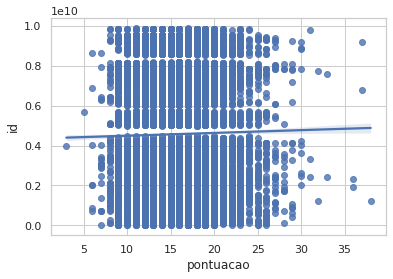

In [298]:
sns.regplot(data=df, x="pontuacao", y="id")

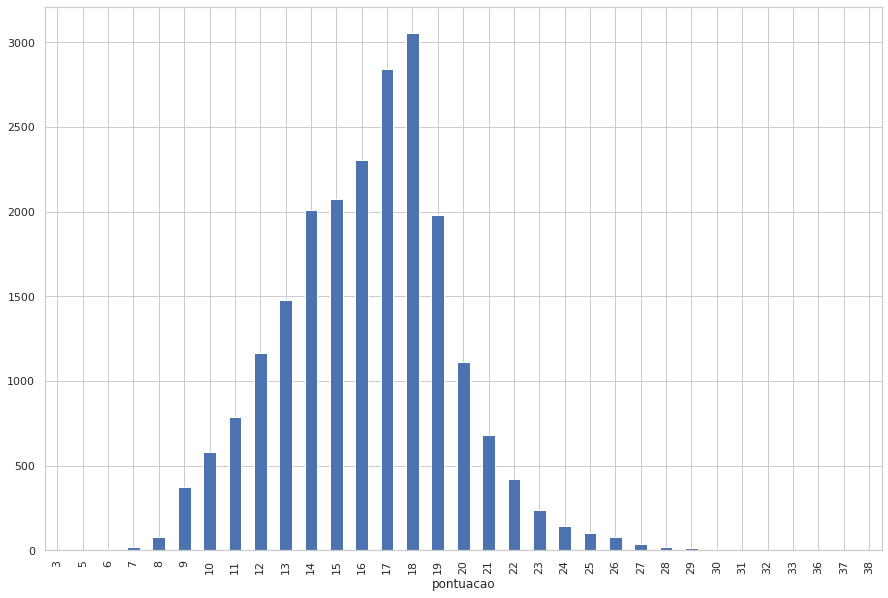

In [305]:
df.groupby("pontuacao").id.count().plot(figsize=(15,10), kind="bar")

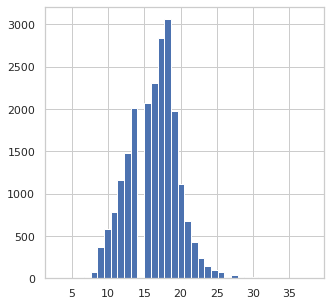

In [322]:
df['pontuacao'].hist(figsize=(5,5), bins = 38)

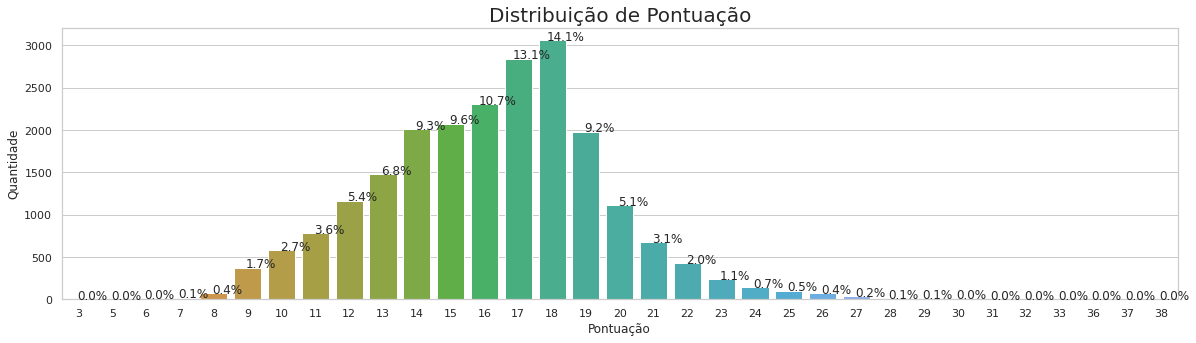

In [320]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))

total = float(df.shape[0])

ax = sns.countplot(x="pontuacao", data=df)
plt.title('Distribuição de Pontuação', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel("Pontuação")
plt.ylabel("Quantidade")
plt.show()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,pontuacao,casa_m²,preço,lote_m²,preço por m²
0,2424059170,20150219T000000,900000.0,5,6.00,7120,40806,2.0,0,4,3,12,5480,1640,2007,0,98006,47.5451,-122.114,3440,36859,31,2170.73,4662000.0,12440.85,2147.664611
1,7851980260,20140730T000000,1110000.0,5,3.50,7350,12231,2.0,0,4,3,11,4750,2600,2001,0,98065,47.5373,-121.865,5380,12587,30,2240.85,5749800.0,3728.96,2565.901332
2,8835770170,20140822T000000,1488000.0,5,6.00,6880,279968,2.0,0,3,3,12,4070,2810,2007,0,98045,47.4624,-121.779,4690,256803,30,2097.56,7707840.0,85356.10,3674.669616
3,4030100290,20141001T000000,1680000.0,5,3.50,5170,7197,3.0,1,4,3,11,3520,1650,1998,0,98155,47.7561,-122.271,3020,12880,30,1576.22,8702400.0,2194.21,5521.056705
4,2626069030,20150209T000000,1940000.0,4,5.75,7220,223462,2.0,0,4,3,12,6220,1000,2000,0,98053,47.7097,-122.013,2680,7593,30,2201.22,10049200.0,68128.66,4565.286523


In [324]:
df_corrMat

,price
bedrooms,0.308350
bathrooms,0.525138
sqft_living,0.702035
sqft_lot,0.089661
floors,0.256794
waterfront,0.266369
view,0.397293
condition,0.036362
grade,0.667434
sqft_above,0.605567
